#Analisando as notas em geral

In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv('ratings.csv')

In [3]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [4]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas.nota.mean()

3.501556983616962

In [6]:
notas.nota.median()

3.5

In [7]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

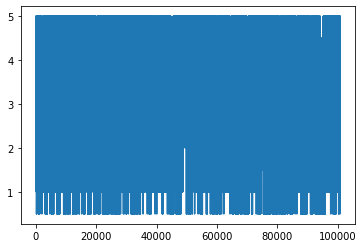

In [8]:
notas.nota.plot()

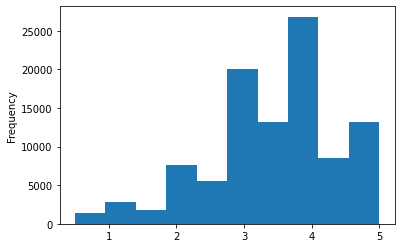

In [9]:
notas.nota.plot(kind='hist')

In [10]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [11]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


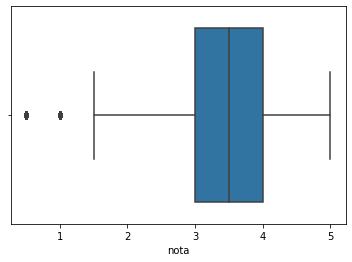

In [12]:
sns.boxplot(notas.nota)

#Olhando os filmes

In [13]:
filmes = pd.read_csv('movies.csv')

In [14]:
filmes.columns = ['filmeId', 'titulo','genero']

In [15]:
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando algumas notas específicas por filme

In [16]:
notas.query('filmeId==1').nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [17]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [18]:
filmes.query('filmeId==2')

,filmeId,titulo,genero
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [19]:
filmes.query('filmeId==2').titulo

1    Jumanji (1995)
Name: titulo, dtype: object

In [20]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [21]:
notas.groupby("filmeId")

In [22]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [23]:
media_por_filme=notas.groupby('filmeId').nota.mean()

In [24]:
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

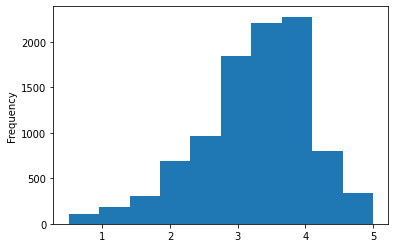

In [25]:
media_por_filme.plot(kind='hist')

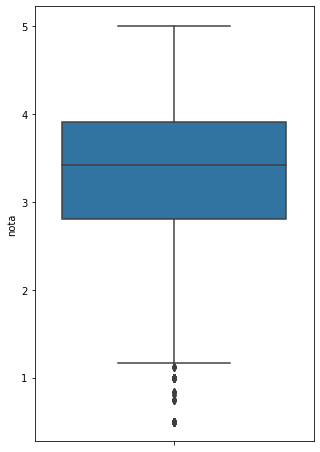

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(y=media_por_filme)

In [27]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

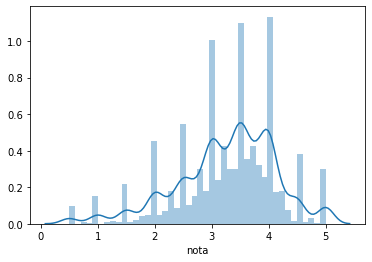

In [28]:
sns.distplot(media_por_filme)

Text(0.5, 1.0, 'Histograma da média dos filmes')

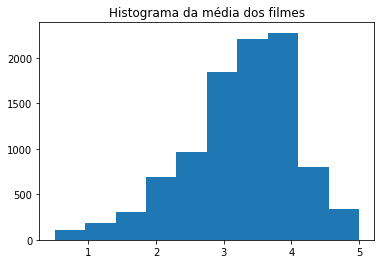

In [29]:
plt.hist(media_por_filme)
plt.title('Histograma da média dos filmes')

#TMDB

In [30]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')

In [31]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [32]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [33]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns=['original_language','total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


In [34]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'he', 'th', 'ro', 'cs', 'id', 'ta', 'ar', 'el',
       'xx', 'is', 'te', 'ps', 'vi', 'ky', 'pl', 'no', 'nb', 'tr', 'hu', 'sl',
       'af'],
      dtype='object')

In [35]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

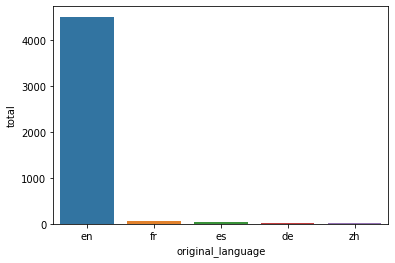

In [36]:
sns.barplot(data=contagem_de_lingua.head(), x="original_language", y='total')

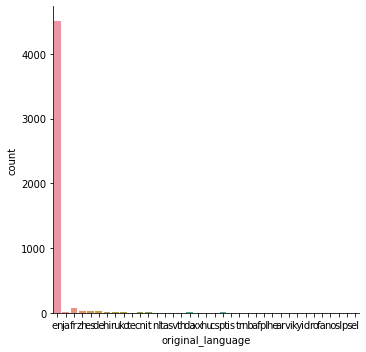

In [37]:
sns.catplot(x="original_language", kind='count', data=tmdb)

([<matplotlib.patches.Wedge at 0x7f12ad30b0f0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

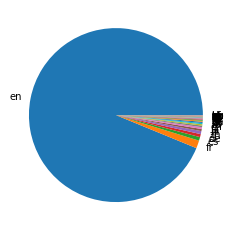

In [38]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

In [39]:
total_por_lingua=tmdb['original_language'].value_counts()
total_geral=total_por_lingua.sum()
total_de_ingles=total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles,total_do_resto)

4505 298


In [40]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


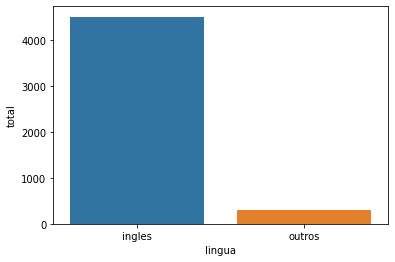

In [41]:
sns.barplot(data=dados, x='lingua', y='total')

In [42]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
cs     2
ar     2
ta     2
id     2
hu     1
sl     1
af     1
is     1
te     1
ps     1
pl     1
vi     1
ky     1
el     1
xx     1
no     1
nb     1
tr     1
Name: original_language, dtype: int64

In [43]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

<Figure size 360x720 with 0 Axes>

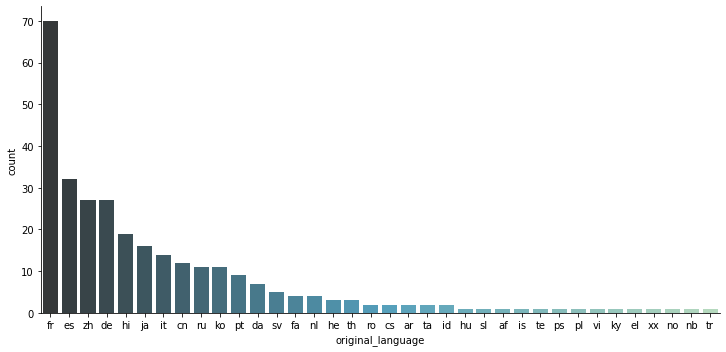

In [44]:
plt.figure(figsize=(5,10))
sns.catplot(data = filmes_sem_lingua_original_em_ingles, kind = 'count',
            x = 'original_language',
            aspect=2,
            order=total_por_lingua_de_outros_filmes.index,
            palette="GnBu_d")

#Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, boxplot e histograma

In [45]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [46]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [47]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [61]:
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [63]:
#simulação
import numpy as np

filme1 = np.append(np.array([2.5] * 10),np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10),np.array([1] * 10))
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


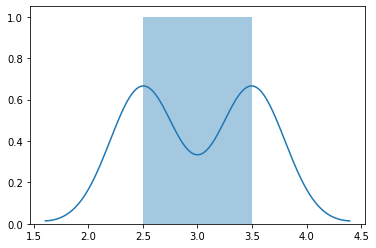

In [51]:
sns.distplot(filme1)

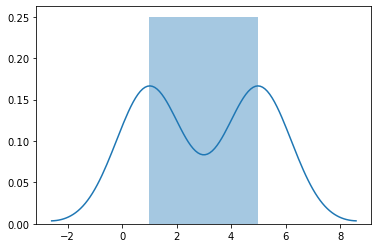

In [52]:
sns.distplot(filme2)

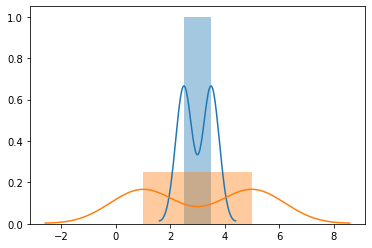

In [53]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

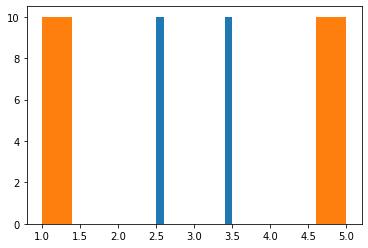

In [54]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f12ad0b6b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f12ad11f198>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f12ad0b9d30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f12ad0b9470>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f12ad0b6630>,
  <matplotlib.lines.Line2D at 0x7f12ad0b5588>]}

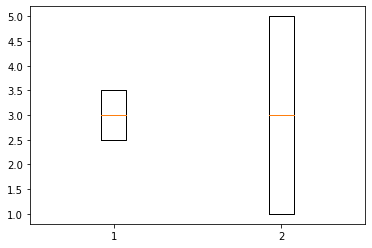

In [55]:
plt.boxplot([filme1,filme2])

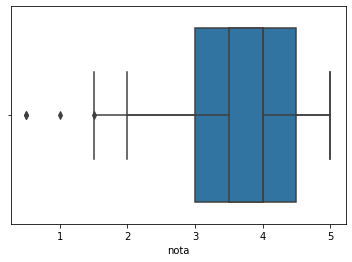

In [56]:
sns.boxplot(notas_do_toy_story.nota)
sns.boxplot(notas_do_jumanji.nota)

{'boxes': [<matplotlib.lines.Line2D at 0x7f12acdfd400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f12acdfddd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f12ace0a898>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f12ace0a518>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f12acdfd6d8>,
  <matplotlib.lines.Line2D at 0x7f12ace16358>]}

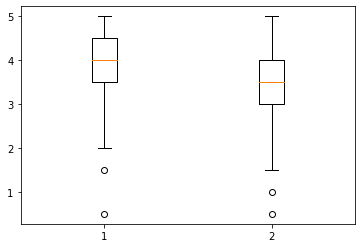

In [57]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

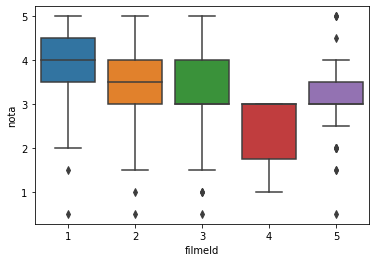

In [58]:
sns.boxplot(x = 'filmeId', y = 'nota', data = notas.query('filmeId in [1,2,3,4,5]'))

In [60]:
print(notas_do_jumanji.nota.std(),notas_do_toy_story.nota.std())

0.8817134921476455 0.8348591407114045
